# Clasification K-Nearest Neighbors (KNN)

- Es un algoritmo de aprendizaje supervisado.
- Clasifica según las clases de los vecinos más cercanos.
- Se basa en distancia (usualmente Euclidiana).
- Es simple y efectivo para datasets pequeños o medianos.

## Fundamentos de la Técnica
El algoritmo K-Nearest Neighbors (KNN) es una técnica de aprendizaje supervisado usada para clasificación y regresión. No construye un modelo explícito; en cambio, clasifica un dato nuevo basándose en los K ejemplos más cercanos dentro del conjunto de entrenamiento según una medida de distancia (generalmente, distancia Euclidiana).

KNN sigue la idea de que los objetos similares tienden a pertenecer a la misma clase.

Es un método simple pero efectivo, especialmente cuando los datos están bien distribuidos y no muy ruidosos.

## Modelo matemático

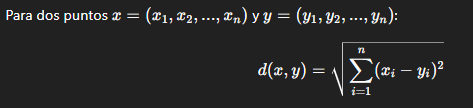

### KNN no aprende por reglas, fórmulas o modelos. Aprende por comparasiones
“Dime con quién se junta y te diré quién es.”

Cuando llega un dato nuevo lo compara con sus vecinos cercanos (midiendo distancia) para ver a que grupo pertenece, hace un "razonamiento" sobre cuales son más cercanos y en base a eso encuentra a que grupo pertenece

K es un número que se elige de manera arbitraria para tomar ese numero de vecinos cercanos, no se compara con todos los puntos en el mapa



## Preprocesamiento


Primeras filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



Descripción estadística:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Conteo de muestras por clase:


,count
target,
0,50
1,50
2,50


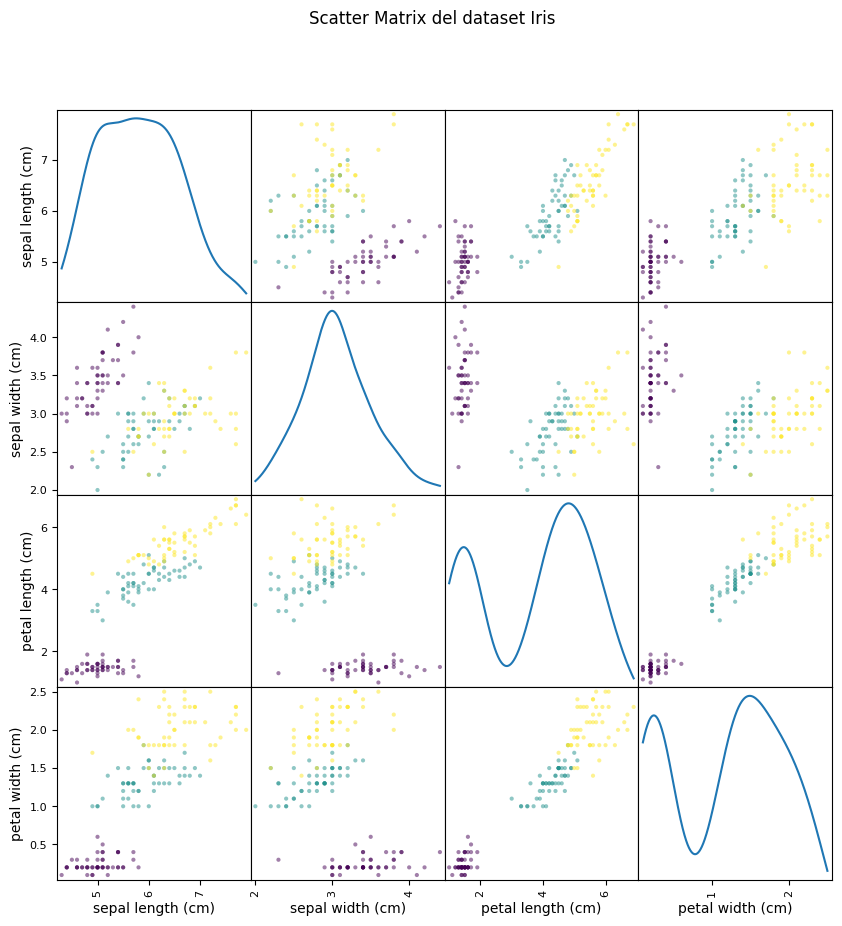

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 1.1 Mostrar primeras filas
print("Primeras filas del dataset:")
display(df.head())

# 1.2 Descripción estadística
print("\nDescripción estadística:")
display(df.describe())

# 1.3 Conteo por clases
print("\nConteo de muestras por clase:")
display(df['target'].value_counts())

# 1.4 Matriz de dispersión (Scatter plot)
pd.plotting.scatter_matrix(
    df.iloc[:, :4],
    figsize=(10, 10),
    diagonal='kde',
    c=df['target'],
    cmap='viridis'
)
plt.suptitle("Scatter Matrix del dataset Iris")
plt.show()

## FEATURE ENGINEERING
En el modelo KNN seleccionamos variables que aportan información relevante para distinguir clases.
En el dataset Iris, las características más útiles suelen ser:

- Largo del pétalo
- Ancho del pétalo

Estás dos características permiten separar los grupos de flores con mayor claridad.
Sin embargo, en este ejemplo usaremos las 4 características del dataset para no perder información.

In [16]:
X = df.iloc[:, :4]   # Las 4 columnas de (largo y ancho de cépalo, largo y ancho de pétalo)
Y = df['target']     # el tipo de planta
print(X)
print(Y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

## Prediction


- train_test_split: importa la funcion que divide la data en conjunto de entrenamiento y de prueba
  - los primeros dos argumentos son para la variable independiente y dependiente,
  - Los otros dos son para establecer que procentaje de la data queremos usar para probar el modelo, en este caso el 80% son de entrenamiento y el 20% son de prueba

- KNeighborsClassifier: es el Modelo clasificador KNN

- knn.fit: este método se usa para entrenar el modelo
  - Primera argumento: recibe los valores independientes escalados
  - Segundo argumento: es para los valores que corresponden a esos puntos, son la variable dependiente

- StandarScaler(): $z = \frac{x - \mu}{\sigma}$ Se usa para que llos valores de largo y ancho de cépalo no dominen ya que la clasificación KNN usa distancia Euclidiana, Se ajusta la media a 0 y la desviación estandar a 1
  - 𝔛 es el valor para cada 𝔛ᵢ
  - $\mu$ es el promedio de los valores de X
  - $\alpha$ es la desviacion estandar
  - z es el resultado de haber escalado el valor de 𝔛 y será sustituido en el data set original

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Escalar los datos del ancho de petalos y largo, entrenar modelo KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Función de predicción
def predict_pattern(pattern):
    # Ejemplo para dataset iris: [5.1, 3.5, 1.4, 0.2]

    # Escalar patrón
    pattern_scaled = scaler.transform([pattern])

    pred = knn.predict(pattern_scaled)[0]
    class_name = data.target_names[pred]

    print(f"Clase predicha: {class_name}")
    return class_name


predict_pattern([5.1, 3.5, 1.4, 0.2])

Clase predicha: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.str_('setosa')

### Matriz de confusion : Es un conteo de cuantas formas de clasificar hay

- Se buscan los Verdaderos/Falsos Positivos, y los Verdaderos/Falsos Negativos

En este caso se podria pensar como: "Uno contra el resto"
$\begin{vmatrix}
& Setosa & Versicolor & Virginica \\
Clase: Setosa & 10 & 0 & 0 \\
Clase: Versicolor & 0 & 9 & 0 \\
Clase: Virginica & 0 & 0 & 11
\end{vmatrix}$

A la izquiera se muestra la clase real a la que pertenece la Flor y arriba estan las predicciones que hizo el modelo

Se puede concluir con que el Modelo pudo clasificar correctamente todas las plantas del subconjunto de prueba del data set original

### Reporte de clasificacion

- Accuracy
$$\text{Precisión}_1 = \frac{VP}{VP + FP} = \frac{10}{10 + 0} = 1.00$$

- Recall
$$\text{Exhaustividad}_1 = \frac{VP}{VP + FN} = \frac{10}{10 + 0} = 1.00$$

- F1-score
$$\text{F1-Score} = 2 \cdot \frac{\text{Precisión} \cdot \text{Exhaustividad}}{\text{Precisión} + \text{Exhaustividad}} = 2 \cdot \frac{1.00 \cdot 1.00}{1.00 + 1.00} = 1.00$$

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(X_test_scaled)

print("Matriz de confusion")
print(confusion_matrix(y_test, y_pred))

print("Reporte de clasificacion")
print(classification_report(y_test, y_pred))

accuracy = knn.score(X_test_scaled, y_test)
print("Precision:", accuracy)

Matriz de confusion
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Reporte de clasificacion
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Precision: 1.0


## Referencias
- GeeksforGeeks. (2025a, agosto 23). KNeArest Neighbor(KNN) algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/

- KNeighborsClassifier. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html